In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('data.csv')

In [22]:
print(f'{df.shape[0]} videos')

868 videos


# Xử lí trường dữ liệu view

In [23]:
df["view"] = df["view"].str.replace("views", "").str.strip()

In [25]:
df.head()

,title,channel,view
0,tripleS 트리플에스 : YoonSeoYeon.SSS,tripleS official,809K
1,tripleS 트리플에스 : dijkstra,tripleS official,75K
2,Introducing Our Haus | tripleS 트리플에스 : SIGNAL ...,tripleS official,181K
3,Gonna Feast | tripleS 트리플에스 : SIGNAL 220510,tripleS official,96K
4,Gonna Dance | tripleS 트리플에스 : SIGNAL 220511,tripleS official,110K


In [24]:
list_view_unit = df['view'].apply(lambda x: x[-1])
print(set(list_view_unit))

{'M', 'K'}


In [31]:
df[df['view'].str.contains('M')]

,title,channel,view
55,Girls in the city | tripleS 트리플에스 : SIGNAL 220625,tripleS official,2.1M
67,We Are One and Also 25 | tripleS 트리플에스 : SIGN...,tripleS official,1.3M
71,HyeRin Passed Out | tripleS 트리플에스 : SSSIGNAL 2...,tripleS official,1.1M
82,ChaeYeon YooYeon Connection | tripleS 트리플에스 : ...,tripleS official,1.3M
83,The Beginning of Hard Training | tripleS 트리플에스...,tripleS official,1.5M
149,"[SONG] They Don’t Know by SeoYeon, JiWoo, YooY...",tripleS official,1M


In [50]:
def view_change(view):
    view = view.lower()
    if 'm' in view:
        return float(view[:-1])*1000000
    elif 'k' in view:
        return float(view[:-1])*1000

In [52]:
df['view'] = df['view'].apply(lambda x: view_change(x))

In [55]:
df.sort_values(by='view', ascending=False)

,title,channel,view
55,Girls in the city | tripleS 트리플에스 : SIGNAL 220625,tripleS official,2100000.0
83,The Beginning of Hard Training | tripleS 트리플에스...,tripleS official,1500000.0
67,We Are One and Also 25 | tripleS 트리플에스 : SIGN...,tripleS official,1300000.0
82,ChaeYeon YooYeon Connection | tripleS 트리플에스 : ...,tripleS official,1300000.0
71,HyeRin Passed Out | tripleS 트리플에스 : SSSIGNAL 2...,tripleS official,1100000.0
...,...,...,...
847,DaHyun from a year ago to DaHyun from one year...,tripleS official,13000.0
858,How HyeRin can make the most of her last teena...,tripleS official,12000.0
859,Baby shark Lynn's sparkling birthday story🦈✨ |...,tripleS official,12000.0
833,HyeRin's behind-the-scenes of Ever01 2nd FCO s...,tripleS official,11000.0


<Axes: xlabel='None', ylabel='view'>

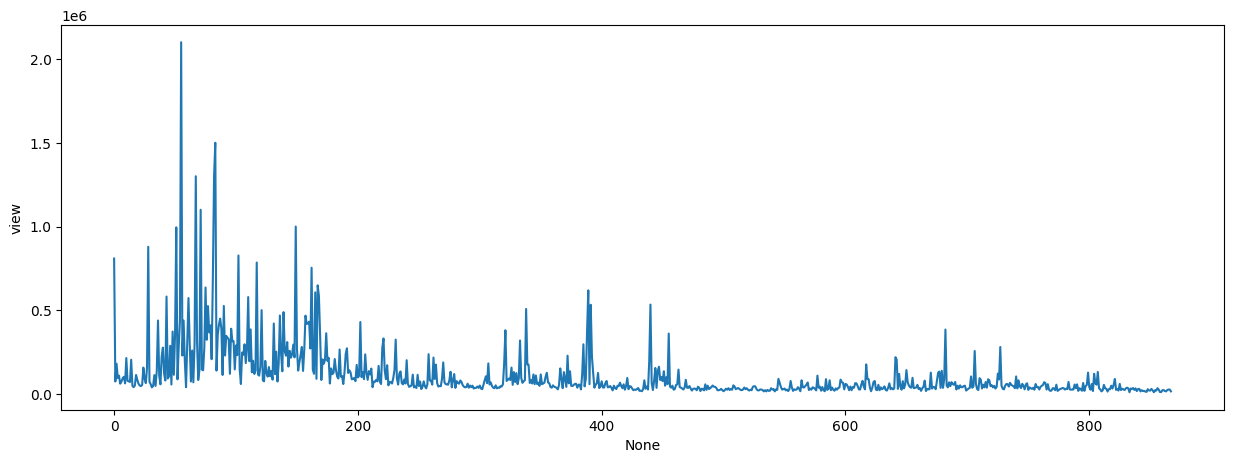

In [66]:
plt.figure(figsize=(15,5))
sns.lineplot(y='view', x=df.index, data=df)